<a href="https://colab.research.google.com/github/Ritzz79/Work-Update/blob/main/Form16_extraction_Yolov3_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Work to be Done :** 
* Create a Flask Application for getting input (.jpg,.jpeg,.pdf and .tiff) from the user and return the extracted entities listed below. 
* Push the code into your personal Git repository ( Do not push the datasets in the Repo )
 

# **Entities to be extracted :**
* Certificate Number
* Last Updated
* PAN Number
* Deducter PAN Number
* Deducter TAN Number
* Assessment Year
* Period with Employer
* Name & Address_Employee
* Name & Address_Employer
* Aggregate
* Gross Salary
* Total tax payable
* Net Salary
* Quarter




## **Target Date of Completion:** 14th July 2022
## **For Queries and support:** @Prem Shanker or @Ranjithkumar Rajagopal 
## Daily Updates to be added here : https://forms.gle/nBtAt42SwciJp6ef6

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/MyDrive/Demo_dataset(Findocs)/Form_16"

Mounted at /content/drive
'financial_document_form 16_2019_11_26-12_44_23_404315_.jpg'
'financial_document_form 16_2019_11_26-12_44_23_404516_.jpg'
'financial_document_form 16_2019_11_26-12_44_23_406525_.jpg'
'financial_document_form 16_2019_11_26-12_44_23_406781_.jpg'
'financial_document_form 16_2019_11_26-12_44_23_407029_.pdf'
'financial_document_form 16_2019_11_26-12_44_23_407277_.jpg'
'financial_document_form 16_2019_11_26-12_44_23_408725_.jpg'
'financial_document_form 16_2019_11_26-12_44_23_413679_.pdf'
'financial_document_form 16_2019_11_26-12_44_23_421285_.pdf'
'financial_document_form 16_2019_11_26-12_44_23_479988_.pdf'
'financial_document_form 16_2019_11_26-12_44_23_565320_.PDF'
'financial_document_form 16_2019_11_26-12_44_23_568244_.jpg'
'financial_document_form 16_2019_11_26-12_44_23_568541_.jpg'
'financial_document_form 16_2019_11_26-12_44_23_568743_.jpg'
'financial_document_form 16_2019_11_26-12_44_23_568926_.jpg'
'financial_document_form 16_2019_11_26-12_44_23_569090_.pdf

In [ ]:
import os
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [ ]:
!git clone https://github.com/roboflow-ai/yolov3  # clone

Cloning into 'yolov3'...
remote: Enumerating objects: 8436, done.
remote: Total 8436 (delta 0), reused 0 (delta 0), pack-reused 8436
Receiving objects: 100% (8436/8436), 6.80 MiB | 32.85 MiB/s, done.
Resolving deltas: 100% (5819/5819), done.


## Get Data from Roboflow

Create an export from Roboflow. **Select "YOLO Darknet" as the export type.**

Our labels will be formatted to our model's architecture.

In [ ]:
# REPLACE THIS LINK WITH YOUR OWN
!curl -L "https://public.roboflow.com/ds/WA9Lrc1j9H?key=VUPbo6qWrD" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1931      0 --:--:-- --:--:-- --:--:--  1931
100 16.8M  100 16.8M    0     0  10.1M      0  0:00:01  0:00:01 --:--:-- 16.9M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
 extracting: test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.txt  
 extracting: test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
 extracting: test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.txt  
 extracting: test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg  
 extracting: test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3

## Organize data and labels for Ultralytics YOLOv3 Implementation

Ultalytics's implemention of YOLOv3 calls for [a specific file management](https://github.com/ultralytics/yolov3/wiki/Train-Custom-Data) where our images are in a folder called `images` and corresponding labels in a folder called `labels`. The image and label names must match identically. Fortunately, our files are named appropriately from Roboflow.

We need to reorganize the folder structure slightly.

In [ ]:
%cd train

/content/valid/train


In [ ]:
%ls

00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.59f0f02a28f020d480fd5d1d8aa32f6d.jpg
00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.59f0f02a28f020d480fd5d1d8aa32f6d.txt
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.dfa577bd4af5440d689046c2f48bc48e.jpg
0115e4df73475b550e5c6f7a88b2474f_jpg.rf.dfa577bd4af5440d689046c2f48bc48e.txt
02f0931b536dfba10affc3231a3d64fb_jpg.rf.7daf233a70122377355a36ca33e82aa4.jpg
02f0931b536dfba10affc3231a3d64fb_jpg.rf.7daf233a70122377355a36ca33e82aa4.txt
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.3ecfd27607406c9f46c1525efd39e17b.jpg
0301b7f9ed4d5ba503fda79fc4370c29_jpg.rf.3ecfd27607406c9f46c1525efd39e17b.txt
03886821377011fec599e8fa12d86e89_jpg.rf.78d439f975872bc0120d597bd265684b.jpg
03886821377011fec599e8fa12d86e89_jpg.rf.78d439f975872bc0120d597bd265684b.txt
03d3ff4582c8125d69c19a72f846bec8_jpg.rf.5f77781cbc56eff8679f258ff4f7cc9f.jpg
03d3ff4582c8125d69c19a72f846bec8_jpg.rf.5f77781cbc56eff8679f258ff4f7cc9f.txt
040f2bcba5afce3afafdd5bbf36d2ca5_jpg.rf.fe6d0720247b60f2c6e1cda98fd00cab.jpg

In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd images

/content/valid/train/images


In [ ]:
# create Ultralytics specific text file of training images
file = open("train_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "train_images_roboflow.txt":
        pass
      else:
        file.write("../train/images/" + filename + "\n")
file.close()

In [ ]:
%cat train_images_roboflow.txt

../train/images/c3e9e81ba1540aae7961a4d8d96600ba_jpg.rf.65c56919cca14d00fbe5d2d44ec569de.jpg
../train/images/055b79dd8db4c43e1a23be6095aaf624_jpg.rf.3eddea89d44864ecd7971d2827ee88df.jpg
../train/images/9fc54a45feb5b01db8f6828d181fb075_jpg.rf.c78f29bbe2df51ae862c73f5cca0eebd.jpg
../train/images/d0cc2420bce5b14dfd39e55dc3737e57_jpg.rf.0f1c927870242d0e614bd6e320f9969e.jpg
../train/images/383c2ed7bbe2d327ab55a871db497c33_jpg.rf.ac062d648b1833d4c5ada1dbc6052060.jpg
../train/images/d67b5b9e900409b050dd9bd594f90709_jpg.rf.7559a07ac3b4029a5a287b4b7b96ea37.jpg
../train/images/4eb630d4dd38528dacf72355caf5c06d_jpg.rf.cef25bd3e5eb142ccd065e5d26049127.jpg
../train/images/6403b91d63799cb9b5531c47b195d088_jpg.rf.cb883855985dd9bb6c6abc4cbe53fa76.jpg
../train/images/859e7157c6d544236a67463c08169b6e_jpg.rf.773fea93fd9593e63fedd9d27f8581a7.jpg
../train/images/4939035108d04ee672570a7cc937e270_jpg.rf.a00ea9b7a719681055868d92c1191fe4.jpg
../train/images/0f4512d71c096f2699d705792e88fc58_jpg.rf.0971fe35ffe3eb

In [ ]:
%cd ../../valid

/content/valid/valid


In [ ]:
%mkdir labels
%mkdir images

In [ ]:
%mv *.jpg ./images/
%mv *.txt ./labels/

In [ ]:
%cd images

/content/valid/valid/images


In [ ]:
# create Ultralytics specific text file of validation images
file = open("valid_images_roboflow.txt", "w") 
for root, dirs, files in os.walk("."):
    for filename in files:
      # print("../train/images/" + filename)
      if filename == "valid_images_roboflow.txt":
        pass
      else:
        file.write("../valid/images/" + filename + "\n")
file.close()

In [ ]:
%cat valid_images_roboflow.txt

../valid/images/d6e283a49b0395a6d5867c9e98e32045_jpg.rf.98019c4213f1dfdb5e6ad1650216f5b6.jpg
../valid/images/18742c87a03866e042c5659ba04d1180_jpg.rf.4424e6a8a441a8389fa7d8691955c4c4.jpg
../valid/images/0d9afc3d23392c3958f53d7fe71fd2f1_jpg.rf.907162426130ed7370ad72200fdd3bc0.jpg
../valid/images/1b7c1c9570e900f75eb974f99cbb3c60_jpg.rf.cf50b35db1eb4d6232850d24c5187794.jpg
../valid/images/26fa37995fa5b18ec40e0a94e6d91104_jpg.rf.ae716df13c86ffbaf972aed9fa4e08ef.jpg
../valid/images/e1616dc9962fed075576ac4ea3553f51_jpg.rf.de48bd9b3a1fbb4e967dc60f36fabce6.jpg
../valid/images/3e0c67f38992fe16dfc163f7f5336263_jpg.rf.4d79300bd37d2259d21ba88499057193.jpg
../valid/images/4b8f93069270a9f7bb523518a5088b9e_jpg.rf.7d625433b528e65c579f62eee62b0847.jpg
../valid/images/3aafc2d38807dddd1b43a54cb70f500d_jpg.rf.561ea7a7774fc0087608ace4aa379998.jpg
../valid/images/fb7d97265a22bb1c1f908dadc6f9e7dc_jpg.rf.2bb7d12a905737aefab726bddf073b15.jpg
../valid/images/3baf85c957b9d28a16c0b65cb2ef0d29_jpg.rf.825ae30ea5a633

## Set up model config

We should configure our model for training.

This requires editing the `roboflow.data` file, which tells our model where to find our data, our numbers of classes, and our class label names.

Our paths for our labels and images are correct.

But we need to update our class names. That's handled below..




In [ ]:
%cd ../../yolov3/data

/content/valid/yolov3/data


In [ ]:
# display class labels imported from Roboflow
%cat ../../train/_darknet.labels

black-bishop
black-king
black-knight
black-pawn
black-queen
black-rook
white-bishop
white-king
white-knight
white-pawn
white-queen
white-rook

In [ ]:
# convert .labels to .names for Ultralytics specification
%cat ../../train/_darknet.labels > ../../train/roboflow_data.names

In [ ]:
def get_num_classes(labels_file_path):
    classes = 0
    with open(labels_file_path, 'r') as f:
      for line in f:
        classes += 1
    return classes

In [ ]:
# update the roboflow.data file with correct number of classes
import re

num_classes = get_num_classes("../../train/_darknet.labels")
with open("roboflow.data") as f:
    s = f.read()
with open("roboflow.data", 'w') as f:
    
    # Set number of classes num_classes.
    s = re.sub('classes=[0-9]+',
               'classes={}'.format(num_classes), s)
    f.write(s)

In [ ]:
# display updated number of classes
%cat roboflow.data

classes=12
train=../train/images/train_images_roboflow.txt
valid=../valid/images/valid_images_roboflow.txt
names=../train/roboflow_data.names


## Training our model

Once we have our data prepped, we'll train our model using the train script.

By default, this script trains for 300 epochs.

In [ ]:
%cd ../

/content/valid/yolov3


In [ ]:
!wget -c https://pjreddie.com/media/files/yolov3.weights
!wget -c https://pjreddie.com/media/files/yolov3-tiny.weights
!wget -c https://pjreddie.com/media/files/yolov3-spp.weights

--2022-07-06 07:44:45--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  17.4MB/s    in 14s     

2022-07-06 07:45:00 (16.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2022-07-06 07:45:01--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  12.4MB/s    in 2.7s    

2022-07-06 07:45:04 (12.4 MB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]

--202

In [ ]:
!python3 train.py --data data/roboflow.data --epochs 10 --weights weights/yolov3-tiny.weights --cfg cfg/yolov3-tiny.cfg  

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-tiny.cfg', data='data/roboflow.data', device='', epochs=10, evolve=False, img_size=[416], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, var=None, weights='weights/yolov3-tiny.weights')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 37 layers, 8.85237e+06 parameters, 8.85237e+06 gradients
Caching labels (606 found, 0 missing, 0 empty, 3 duplicate, for 606 images): 100% 606/606 [00:00<00:00, 1275.17it/s]
Caching labels (58 found, 0 missing, 0 empty, 0 duplicate, for 58 images): 100% 58/58 [00:00<00:00, 1088.50it/s]
Using 2 dataloader workers
Starting training for 10 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
  0% 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming re

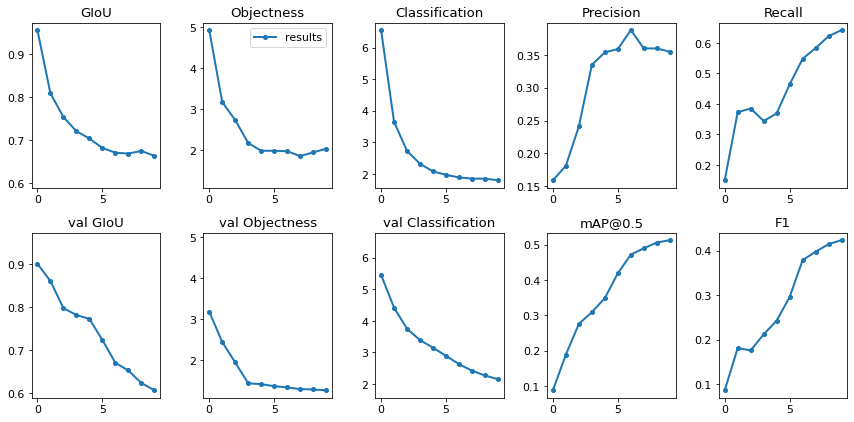

In [ ]:
from utils import utils; utils.plot_results()

## Display training performance

We'll use a default provided script to display image results. **For example:**


## Conduct inference and display results



### Conduct inference

The below script has a few key arguments we're using:
- **Weights**: we're specifying the weights to use for our model should be those that we most recently used in training
- **Source**: we're specifying the source images we want to use for our predictions
- **Names**: we're defining the names we want to use. Here, we're referencing `roboflow_data.names`, which we created from our Roboflow `_darknet.labels`italicized text above.

In [ ]:
!python3 detect.py --weights weights/yolov3-tiny.weights --cfg cfg/yolov3-tiny.cfg --source=../test --names=../train/roboflow_data.names

Namespace(agnostic_nms=False, cfg='cfg/yolov3-tiny.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.6, names='../train/roboflow_data.names', output='output', save_txt=False, source='../test', view_img=False, weights='weights/yolov3-tiny.weights')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 37 layers, 8.85237e+06 parameters, 8.85237e+06 gradients
/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
image 1/29 ../test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg: 416x416 Done. (0.073s)
image 2/29 ../test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg: 416x416 Done. (0.006

In [ ]:
!python3 detect.py --weights weights/last.pt --source=../test --names=../train/roboflow_data.names

### Displaying our results

Ultralytics generates predictions which include the labels and bounding boxes "printed" directly on top of our images. They're saved in our `output` directory within the YOLOv3 repo we cloned above.

In [ ]:
# import libraries for display
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Image
from glob import glob
import random
import PIL

In [ ]:
# plot just one random image prediction
filename = random.choice(os.listdir('./output'))
print(filename)
Image('./output/' + filename)

In [ ]:
# grab all images from our output directory
images = [ PIL.Image.open(f) for f in glob('./output/*') ]

In [ ]:
# convert images to numPy
def img2array(im):
    if im.mode != 'RGB':
        im = im.convert(mode='RGB')
    return np.fromstring(im.tobytes(), dtype='uint8').reshape((im.size[1], im.size[0], 3))

In [ ]:
# create array of numPy images
np_images = [ img2array(im) for im in images ]

In [ ]:
# plot ALL results in test directory (NOTE: adjust figsize as you please)
for img in np_images:
    plt.figure(figsize=(8, 6))
    plt.imshow(img)

## Save Our Weights

We can save the weights of our model to use them for inference in the future, or pick up training where we left off. 

We can first save them locally. We'll connect our Google Drive, and save them there.


In [ ]:
# save locally
from google.colab import files
files.download('./weights/last.pt')

In [ ]:
# connect Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
%pwd

In [ ]:
# create a copy of the weights file with a datetime 
# and move that file to your own Drive
%cp ./weights/last.pt ./weights/last_copy.pt
%mv ./weights/last_copy.pt /content/gdrive/My\ Drive

# Basic Flask Application

In [ ]:
from unicodedata import name
from flask import Flask
app = Flask(__name__)

@app.route("/")

def home():
    return "Hello Flask!"

# extracting text from jpg file

In [1]:
!pip install PyPDF2
!pip install opencv-python-headless==4.1.2.30
!pip install easyocr
!apt-get install poppler-utils
!pip install pdf2image
!pip install pdfminer.six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 17 kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-u

In [2]:
!mkdir data
!mkdir textExtracted

### Note: add data to the data folder

In [4]:
%cd ..

/content


In [3]:
import os
import easyocr
from pdf2image import convert_from_path
import numpy as np
reader = easyocr.Reader(['en']) 
fl=0
path='/content/data/'
path1='/content/textExtracted/'
image_list=os.listdir(path)
for filename in os.listdir(path):
  if filename[-3:]=='pdf' or filename[-3:]=='PDF':
    images = convert_from_path(path+'/'+filename)
    #print(images)
    line=''
    for j in range(len(images)):
      #print(images[j])
      text = reader.readtext(np.array(images[j]),detail=0)
      for tex in text:
          line=line+' '+tex
    # f=open(path1+str(fl)+".txt","w+")
    # print(path1+str(fl)+".txt")
    # for i in line:
    #     f.write(i)
    # f.close()
    # fl+=1
  elif filename[-3:]=='jpg' or filename[-3:]=='JPG':    
    line=''
    text = reader.readtext('data/'+filename,detail=0)
    for tex in text:
        line=line+' '+tex
  f=open(path1+str(fl)+".txt","w+")
  print(path1+str(fl)+".txt")
  for i in line:
      f.write(i)
  f.close()
  fl+=1

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Completefinancial_document_form 16_2019_11_26-12_44_23_568926_.jpg
financial_document_form 16_2019_11_26-12_44_23_568926_.jpg
/content/textExtracted/0.txt
financial_document_form 16_2019_11_26-12_44_23_576237_.jpg
financial_document_form 16_2019_11_26-12_44_23_576237_.jpg
/content/textExtracted/1.txt
financial_document_form 16_2019_11_26-12_44_23_565320_.PDF
/content/textExtracted/2.txt
financial_document_form 16_2019_11_26-12_44_23_586289_.jpg
financial_document_form 16_2019_11_26-12_44_23_586289_.jpg
/content/textExtracted/3.txt
financial_document_form 16_2019_11_26-12_44_23_404516_.jpg
financial_document_form 16_2019_11_26-12_44_23_404516_.jpg
/content/textExtracted/4.txt
financial_document_form 16_2019_11_26-12_44_23_656769_.PDF
/content/textExtracted/5.txt
financial_document_form 16_2019_11_26-12_44_23_659973_.pdf
/content/textExtracted/6.txt
financial_document_form 16_2019_11_26-12_44_23_570731_.jpg
financial_d

In [5]:
#downloading extracted text files as zip folder
!zip -r /content/textExtracted.zip /content/textExtracted

updating: content/textExtracted/ (stored 0%)
updating: content/textExtracted/23.txt (deflated 59%)
updating: content/textExtracted/7.txt (deflated 51%)
updating: content/textExtracted/3.txt (deflated 58%)
updating: content/textExtracted/13.txt (deflated 57%)
updating: content/textExtracted/26.txt (deflated 60%)
updating: content/textExtracted/8.txt (deflated 58%)
updating: content/textExtracted/1.txt (deflated 48%)
updating: content/textExtracted/9.txt (deflated 59%)
updating: content/textExtracted/4.txt (deflated 52%)
updating: content/textExtracted/2.txt (deflated 59%)
updating: content/textExtracted/14.txt (deflated 43%)
updating: content/textExtracted/21.txt (deflated 48%)
updating: content/textExtracted/5.txt (deflated 62%)
updating: content/textExtracted/27.txt (deflated 67%)
updating: content/textExtracted/10.txt (deflated 50%)
updating: content/textExtracted/25.txt (deflated 57%)
updating: content/textExtracted/18.txt (deflated 53%)
updating: content/textExtracted/17.txt (defla

In [ ]:
for i in os.listdir('/content/'):
  if i[-3:]=='txt':
    os.remove(i)